In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/.DS_Store
/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/Breast Cancer Wisconsin Dataset.csv
/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/IRIS.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data='/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/Breast Cancer Wisconsin Dataset.csv'
df=pd.DataFrame(pd.read_csv(data))

In [4]:
df.drop(['radius_se', 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst','Unnamed: 32'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [5]:
col_names=['diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points'
         ,'symmetry','fractal_dimension']
df.columns=col_names
df.columns

Index(['diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness',
       'compactness', 'concavity', 'concave_points', 'symmetry',
       'fractal_dimension'],
      dtype='object')

In [6]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

df.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [7]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

2022-11-16 22:46:24.174100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
classifier = Sequential()

2022-11-16 22:46:28.536605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
classifier.add(Dense(activation="relu", input_dim=10, units=8, kernel_initializer="uniform"))
classifier.add(Dropout(rate=0.1))

In [14]:
classifier.add(Dense(activation="relu", units=8, kernel_initializer="uniform"))
classifier.add(Dropout(rate=0.1))

In [15]:
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [16]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
%%time
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.6396
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.6374
Epoch 3/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.6374
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.6374
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.6374
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.6374
Epoch 7/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.6374
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6374
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6462
Epoch 10/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6681
Epoch 11/150
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.1439 - accuracy: 0.9451
Epoch 85/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1447 - accuracy: 0.9495
Epoch 86/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1397 - accuracy: 0.9495
Epoch 87/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.9473
Epoch 88/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1493 - accuracy: 0.9538
Epoch 89/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1357 - accuracy: 0.9451
Epoch 90/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1424 - accuracy: 0.9516
Epoch 91/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.9495
Epoch 92/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1439 - accuracy: 0.9429
Epoch 93/150
5/5 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9451
Epoch 94/150
5/5 [===============

In [18]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 1ms/step


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
y_test.shape


(114,)

In [20]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/114)*100))

Our accuracy is 92.98245614035088%


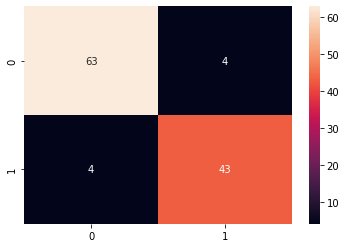

In [21]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [22]:
y=df.diagnosis
x=df.drop('diagnosis', axis=1)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled)
x_scaled.info

<bound method DataFrame.info of             0         1         2         3         4         5         6  \
0    1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1    1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2    1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3   -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4    1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   
..        ...       ...       ...       ...       ...       ...       ...   
564  2.110995  0.721473  2.060786  2.343856  1.041842  0.219060  1.947285   
565  1.704854  2.085134  1.615931  1.723842  0.102458 -0.017833  0.693043   
566  0.702284  2.045574  0.672676  0.577953 -0.840484 -0.038680  0.046588   
567  1.838341  2.336457  1.982524  1.735218  1.525767  3.272144  3.296944   
568 -1.808401  1.221792 -1.814389 -1.347789 -3.112085 -1.150752 -1.114873   

            7         8         9  
0    2.

In [23]:
x_scaled = x_scaled.iloc[:, [0, 1, 2, 3,4,5,6,7,8,9]].values

In [24]:
from sklearn.decomposition import PCA
import matplotlib as mpl
pca = PCA(n_components=2, random_state=0)
pca.fit(x_scaled)
x_pca_array = pca.transform(x_scaled)
x_pca = pd.DataFrame(x_pca_array,columns=['PC1','PC2'])
x_pca_new=pd.DataFrame()
x_pca_new['PC1'] = x_pca['PC1']
x_pca_new['PC2'] = x_pca['PC2']
print('2 principal components account for {:.4f}% of the variance.'.format(100 * np.sum(pca.explained_variance_ratio_[:2])))

2 principal components account for 79.9730% of the variance.


In [25]:
y = df['diagnosis']

In [26]:
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [27]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(x_pca_new, y, test_size = 0.2, random_state = 0)

In [28]:
classifier1 = Sequential()

In [29]:
classifier1.add(Dense(activation="relu", input_dim=2, units=8, kernel_initializer="uniform"))
classifier1.add(Dropout(rate=0.1))

In [30]:
classifier1.add(Dense(activation="relu", units=8, kernel_initializer="uniform"))
classifier1.add(Dropout(rate=0.1))

In [31]:
classifier1.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [32]:
classifier1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
%%time
classifier1.fit(X_train_new, y_train_new, batch_size=100, epochs=150)

Epoch 1/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5736
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.6374
Epoch 3/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.6374
Epoch 4/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.6374
Epoch 5/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.6374
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.6374
Epoch 7/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.6374
Epoch 8/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.6396
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.6484
Epoch 10/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.6527
Epoch 11/150
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.9319
Epoch 85/150
5/5 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.9275
Epoch 86/150
5/5 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.9385
Epoch 87/150
5/5 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.9297
Epoch 88/150
5/5 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.9363
Epoch 89/150
5/5 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.9341
Epoch 90/150
5/5 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.9385
Epoch 91/150
5/5 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.9407
Epoch 92/150
5/5 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.9319
Epoch 93/150
5/5 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.9407
Epoch 94/150
5/5 [===============

In [35]:
y_pred_new = classifier1.predict(X_test_new)
y_pred_new = (y_pred > 0.5)

4/4 [==============================] - 0s 1ms/step


In [38]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test_new, y_pred_new)
y_test_new.shape

(114,)

In [39]:
print("Our accuracy is {}%".format(((cm1[0][0] + cm1[1][1])/114)*100))

Our accuracy is 92.98245614035088%
